In [135]:
# Importamos las librerías:
import matplotlib.pyplot as plt
plt.style.use('classic')
# Línea necesaria para que Matplotlib muestre por defecto los gráficos en nuestro Notebook:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
from datetime import datetime

In [294]:
#función para formato de gráficos
def plot_sales_chart(df, title, save_title, x_var, y_var, label_names, x_label, y_label):
    
    # create the bar plot
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=x_var, y=y_var, data=df, palette=color)

    # add labels to the bars
    for i, v in enumerate(df[label_names]):
        ax.text(v + 1, i, str(v), color='black')


    # set the chart title and labels
    plt.title(title, fontweight='bold', fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # save the plot as a PNG file
    plt.savefig(f'images/{save_title}', dpi=300, bbox_inches='tight')

    # show the plot
    return plt.show()

In [136]:
movimientos="G:\Mi unidad\CARME\Trabajos\data\deodorants_final_merged_v1.csv"
df = pd.read_csv(movimientos, sep=",", skiprows=0)

In [ ]:
df.head()

In [138]:
df.describe()

,idb,id_producto,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,mov_weekday,...,duracion_promo,id_cadena,longitud,latitud,local,punto_dist,id_region,is_weekend,tiene_promo,zona
count,8.272128e+06,8.272128e+06,8.272128e+06,8.272128e+06,8.272128e+06,8.272128e+06,8.272128e+06,8.272128e+06,8.272128e+06,8.272128e+06,...,8.272128e+06,8.272128e+06,8.272128e+06,8.272128e+06,8.272128e+06,8.272128e+06,8.272128e+06,8.272128e+06,8.272128e+06,8.272128e+06
mean,6.991175e+03,3.781817e+05,2.088143e+01,3.169305e-01,6.446128e+01,9.609215e-01,5.464377e+03,6.480312e+00,2.017672e+03,3.002376e+00,...,1.500399e-01,4.274465e+00,-5.872817e+01,-3.506349e+01,9.899061e-01,1.009390e-02,9.377802e-01,2.866678e-01,1.647339e-02,3.717005e+00
std,3.299621e+03,9.161289e+04,1.494613e+02,8.990582e-01,6.604925e+01,1.937817e-01,4.528327e+03,3.452697e+00,9.807317e-01,2.000168e+00,...,1.246558e+00,2.617869e+00,1.394333e+00,2.035385e+00,9.996004e-02,9.996004e-02,2.415543e-01,4.522051e-01,1.272872e-01,6.449873e-01
min,2.420000e+02,1.641460e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.016000e+03,0.000000e+00,...,0.000000e+00,2.000000e+00,-6.749604e+01,-4.587265e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.211000e+03,2.929450e+05,6.000000e+00,0.000000e+00,2.251000e+01,1.000000e+00,0.000000e+00,3.000000e+00,2.017000e+03,1.000000e+00,...,0.000000e+00,2.000000e+00,-5.869611e+01,-3.498957e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,9.026000e+03,4.152680e+05,1.000000e+01,0.000000e+00,3.823000e+01,1.000000e+00,9.217000e+03,6.000000e+00,2.018000e+03,3.000000e+00,...,0.000000e+00,4.000000e+00,-5.846482e+01,-3.462789e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,9.159000e+03,4.583930e+05,1.700000e+01,0.000000e+00,7.895000e+01,1.000000e+00,9.217000e+03,1.000000e+01,2.018000e+03,5.000000e+00,...,0.000000e+00,4.000000e+00,-5.839790e+01,-3.457732e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00
max,9.977000e+03,5.113260e+05,1.621800e+04,6.120000e+02,4.238100e+02,1.000000e+00,9.217000e+03,1.200000e+01,2.019000e+03,6.000000e+00,...,1.800000e+01,9.000000e+00,-5.668353e+01,-2.914198e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00


In [139]:
df.nunique()

idb                        142
id_producto                 91
fecha_trans               1092
stock_unidades            4289
venta_unidades              68
precio_unitario            283
sigue_prod_en_rol            2
cd_abast                     2
mov_month                   12
mov_year                     4
mov_weekday                  7
ventas_estimadas_promo     152
nro_prom                   117
duracion_promo              14
id_cadena                    3
desc_cadena                  3
longitud                   127
latitud                    127
local                        2
punto_dist                   2
desc_producto               82
razon_social                 5
id_region                    2
dia_semana                   7
is_weekend                   2
tiene_promo                  2
estacion                     4
zona                         4
dtype: int64

In [140]:
df_cleaned=df.sort_values(by=['idb','id_producto', 'fecha_trans'], ascending=True)

In [534]:
df_cleaned.head(50)

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,...,local,punto_dist,desc_producto,razon_social,id_region,dia_semana,is_weekend,tiene_promo,estacion,zona
6893091,242,228217,2016-07-15,24,0,13.63,1,0,7,2016,...,1,0,glade toque rep limon 12mlx12 repuesto 12 mlt,s. c. johnson y son de arg. s.a.,1,Friday,0,0,verano,4
6885257,242,228217,2016-07-16,24,0,13.63,1,0,7,2016,...,1,0,glade toque rep limon 12mlx12 repuesto 12 mlt,s. c. johnson y son de arg. s.a.,1,Saturday,1,0,verano,4
6881639,242,228217,2016-07-17,24,0,13.63,1,0,7,2016,...,1,0,glade toque rep limon 12mlx12 repuesto 12 mlt,s. c. johnson y son de arg. s.a.,1,Sunday,1,0,verano,4
6877607,242,228217,2016-07-18,24,0,13.63,1,0,7,2016,...,1,0,glade toque rep limon 12mlx12 repuesto 12 mlt,s. c. johnson y son de arg. s.a.,1,Monday,0,0,verano,4
6871215,242,228217,2016-07-19,24,0,13.63,1,0,7,2016,...,1,0,glade toque rep limon 12mlx12 repuesto 12 mlt,s. c. johnson y son de arg. s.a.,1,Tuesday,0,0,verano,4
6863689,242,228217,2016-07-20,24,0,13.63,1,0,7,2016,...,1,0,glade toque rep limon 12mlx12 repuesto 12 mlt,s. c. johnson y son de arg. s.a.,1,Wednesday,0,0,verano,4
6856471,242,228217,2016-07-21,24,0,13.63,1,0,7,2016,...,1,0,glade toque rep limon 12mlx12 repuesto 12 mlt,s. c. johnson y son de arg. s.a.,1,Thursday,0,0,verano,4
6848623,242,228217,2016-07-22,24,0,13.63,1,0,7,2016,...,1,0,glade toque rep limon 12mlx12 repuesto 12 mlt,s. c. johnson y son de arg. s.a.,1,Friday,0,0,verano,4
6841143,242,228217,2016-07-23,24,0,13.63,1,0,7,2016,...,1,0,glade toque rep limon 12mlx12 repuesto 12 mlt,s. c. johnson y son de arg. s.a.,1,Saturday,1,0,verano,4
6831381,242,228217,2016-07-24,24,0,13.63,1,0,7,2016,...,1,0,glade toque rep limon 12mlx12 repuesto 12 mlt,s. c. johnson y son de arg. s.a.,1,Sunday,1,0,verano,4


**PREGUNTA 1.**
*Cual es el producto que tiene mayor rotacion por idb, por año, por mes*

La rotacion de inventario de un producto se calcula como:

*Rotación Inventario [RI] = Ventas del periodo / Promedio de inventario del periodo*

    Donde: 
        Promedio de Inventario = (Inventario Inicial + Inventario Final) / 2
           -  Inventario Inicial: es la cantidad de inventario que tenías al inicio del mes.
           -  Inventario Final: es la cantidad de inventario que tenías al final del mes.

In [142]:
df.fecha_trans=pd.to_datetime(df.fecha_trans,format='%Y-%m-%d', errors='coerce')

In [495]:
# Se cacula las ventas mensuales acumuladas por producto y tienda
df_ventas_mensuales = df.groupby(['id_producto', 'idb','mov_year', 'mov_month', pd.Grouper(key='fecha_trans', freq='MS')])['venta_unidades'].sum().reset_index().rename(columns={'venta_unidades': 'Ventas_mensuales'})

# vamos a poner también el número de promociones acumuladas mensuales por producto y tienda
df_promociones= df.groupby(['id_producto', 'idb','mov_year', 'mov_month', pd.Grouper(key='fecha_trans', freq='MS')])['tiene_promo'].sum().reset_index().rename(columns={'tiene_promo': 'promos_mensuales'})

# juntamos las tablas
df_ventas= df_ventas_mensuales.merge(df_promociones, on=['id_producto', 'idb','mov_year', 'mov_month'])
df_ventas = df_ventas[['id_producto', 'idb', 'mov_year', 'mov_month', 'Ventas_mensuales', 'promos_mensuales']]

In [503]:
df_ventas.describe()

,id_producto,idb,mov_year,mov_month,Ventas_mensuales,promos_mensuales
count,285763.000000,285763.000000,285763.000000,285763.000000,285763.000000,285763.000000
mean,378619.371077,6989.818147,2017.678622,6.476916,9.174351,0.476864
std,91719.856824,3301.881394,0.994968,3.396752,11.788948,2.306881
min,164146.000000,242.000000,2016.000000,1.000000,0.000000,0.000000
25%,292945.000000,5211.000000,2017.000000,4.000000,2.000000,0.000000
50%,415268.000000,9026.000000,2018.000000,7.000000,6.000000,0.000000
75%,458393.000000,9159.000000,2018.000000,9.000000,12.000000,0.000000
max,511326.000000,9977.000000,2019.000000,12.000000,612.000000,35.000000


Llama mucho la atención que el número de promociones mensuales sea 35 pues un mes no tiene más de 31 días, miramos a ver qué pasa

In [513]:
df_max=df_promociones[df_promociones['promos_mensuales']==35]
df_max.describe()

,id_producto,idb,mov_year,mov_month,promos_mensuales
count,142.000000,142.000000,142.0,142.0,142.0
mean,389973.211268,8229.253521,2019.0,4.0,35.0
std,61966.394947,2854.484031,0.0,0.0,0.0
min,292945.000000,277.000000,2019.0,4.0,35.0
25%,342689.000000,9006.000000,2019.0,4.0,35.0
50%,356513.000000,9127.000000,2019.0,4.0,35.0
75%,455618.750000,9240.000000,2019.0,4.0,35.0
max,507527.000000,9697.000000,2019.0,4.0,35.0


In [537]:
df_check=df.groupby(['id_producto', 'idb', 'fecha_trans'])['tiene_promo'].sum().reset_index().rename(columns={'tiene_promo': 'promos_mensuales'})

In [637]:
df_check.describe()
df_check.promos_mensuales.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [550]:
df_=df[(df['id_producto']==164146) & (df['idb']==5201) & (df['fecha_trans']=='2017-05-22')]
df_

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,...,local,punto_dist,desc_producto,razon_social,id_region,dia_semana,is_weekend,tiene_promo,estacion,zona
4788146,5201,164146,2017-05-22,25,3,29.56,1,0,5,2017,...,1,0,missing,unknown,0,Monday,0,1,primavera,4
4788277,5201,164146,2017-05-22,25,3,29.56,1,0,5,2017,...,1,0,missing,unknown,0,Monday,0,1,primavera,4


In [554]:
df_.duplicated().sum()

0

In [555]:
df_.nunique()

idb                       1
id_producto               1
fecha_trans               1
stock_unidades            1
venta_unidades            1
precio_unitario           1
sigue_prod_en_rol         1
cd_abast                  1
mov_month                 1
mov_year                  1
mov_weekday               1
ventas_estimadas_promo    2
nro_prom                  1
duracion_promo            1
id_cadena                 1
desc_cadena               1
longitud                  1
latitud                   1
local                     1
punto_dist                1
desc_producto             1
razon_social              1
id_region                 1
dia_semana                1
is_weekend                1
tiene_promo               1
estacion                  1
zona                      1
dtype: int64

La conclusión es que hay algunos registros que tienen promociones con el mismo número de promoción asociado a un mismo día y número de ventas estimadas diferente..es un poco raro a ver con Erika. Seguimos como si fuera correcto

Calculamos los valores de stock inicial y final de cada mes

In [382]:
# Filtrado de inventario inicial en el periodo mensual por producto, tienda y año/mes
df_stock_ini = df.loc[df.groupby(['id_producto', 'idb', 'mov_year', 'mov_month',pd.Grouper(key='fecha_trans', freq='MS')])['fecha_trans'].idxmin()].rename(columns={'stock_unidades': 'Inventario Inicial'})

In [384]:
# Filtrado de inventario final en el periodo mensual por producto, tienda y año/mes
df_stock_fin = df.loc[df.groupby(['id_producto', 'idb','mov_year', 'mov_month', pd.Grouper(key='fecha_trans', freq='MS')])['fecha_trans'].idxmax()].rename(columns={'stock_unidades': 'Inventario Final'})

In [497]:
# Unimos la tabla
df_stock = df_stock_ini.merge(df_stock_fin, on=['id_producto', 'idb', 'mov_year', 'mov_month'])

# Seleccionamos las columnas que queremos de esta tabla
df_stock = df_stock[['id_producto', 'idb', 'mov_year', 'mov_month', 'Inventario Inicial', 'Inventario Final']]
#df_stock.head()

In [691]:
# Unimos la tabla con las ventas
df_final = df_ventas.merge(df_stock, on=['id_producto', 'idb', 'mov_year', 'mov_month'])
df_final.describe()

,id_producto,idb,mov_year,mov_month,Ventas_mensuales,promos_mensuales,Inventario Inicial,Inventario Final
count,285763.000000,285763.000000,285763.000000,285763.000000,285763.000000,285763.000000,285763.000000,285763.000000
mean,378619.371077,6989.818147,2017.678622,6.476916,9.174351,0.476864,20.320181,20.366657
std,91719.856824,3301.881394,0.994968,3.396752,11.788948,2.306881,145.012456,144.973669
min,164146.000000,242.000000,2016.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,292945.000000,5211.000000,2017.000000,4.000000,2.000000,0.000000,5.000000,5.000000
50%,415268.000000,9026.000000,2018.000000,7.000000,6.000000,0.000000,10.000000,10.000000
75%,458393.000000,9159.000000,2018.000000,9.000000,12.000000,0.000000,17.000000,17.000000
max,511326.000000,9977.000000,2019.000000,12.000000,612.000000,35.000000,13304.000000,13322.000000


In [692]:
# Creamos nueva columna con el cálculo de promedio mensual de inventario
df_final['stock_medio'] = (df_final['Inventario Inicial'] + df_final['Inventario Final']) / 2

In [693]:
# Calculamos el índice de rotación, y lo ponemos en una nueva columna
df_final['RI']= df_final['Ventas_mensuales']/df_final['stock_medio']
df_final.describe()

,id_producto,idb,mov_year,mov_month,Ventas_mensuales,promos_mensuales,Inventario Inicial,Inventario Final,stock_medio,RI
count,285763.000000,285763.000000,285763.000000,285763.000000,285763.000000,285763.000000,285763.000000,285763.000000,285763.000000,2.771900e+05
mean,378619.371077,6989.818147,2017.678622,6.476916,9.174351,0.476864,20.320181,20.366657,20.343419,inf
std,91719.856824,3301.881394,0.994968,3.396752,11.788948,2.306881,145.012456,144.973669,137.188775,NaN
min,164146.000000,242.000000,2016.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,292945.000000,5211.000000,2017.000000,4.000000,2.000000,0.000000,5.000000,5.000000,6.000000,2.000000e-01
50%,415268.000000,9026.000000,2018.000000,7.000000,6.000000,0.000000,10.000000,10.000000,10.000000,5.714286e-01
75%,458393.000000,9159.000000,2018.000000,9.000000,12.000000,0.000000,17.000000,17.000000,16.000000,1.126340e+00
max,511326.000000,9977.000000,2019.000000,12.000000,612.000000,35.000000,13304.000000,13322.000000,12434.000000,inf


Eliminamos los registros que tienen stock promedio 0 dado que dan infinito en RI y no se puede calcular

In [703]:
df_final_filtered=df_final[df_final['stock_medio']>=1]
df_final_filtered.describe()

,id_producto,idb,mov_year,mov_month,Ventas_mensuales,promos_mensuales,Inventario Inicial,Inventario Final,stock_medio,RI
count,273951.000000,273951.000000,273951.000000,273951.000000,273951.000000,273951.000000,273951.000000,273951.000000,273951.000000,273951.000000
mean,377166.118061,6990.146012,2017.689331,6.438765,9.481911,0.477954,21.193060,21.242744,21.217902,0.867159
std,91777.875041,3302.498565,0.991041,3.402020,11.884177,2.314118,148.043489,148.003404,140.049133,1.355157
min,164146.000000,242.000000,2016.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,292945.000000,5211.000000,2017.000000,4.000000,2.000000,0.000000,6.000000,6.000000,6.500000,0.200000
50%,407845.000000,9026.000000,2018.000000,6.000000,6.000000,0.000000,10.000000,10.000000,10.500000,0.560000
75%,458393.000000,9159.000000,2018.000000,9.000000,12.000000,0.000000,17.000000,17.000000,16.500000,1.100000
max,511326.000000,9977.000000,2019.000000,12.000000,612.000000,35.000000,13304.000000,13322.000000,12434.000000,72.000000


Las primeras observaciones son:
-  Hay productos con gran RI, se ve valor máximo de 72, mientras que el 75% de los datos estan en 1.1 o inferior y la media de los valores es 0.887, esto indica que hay unos pocos productos que estan por encima de 1.1 pero lo estan mucho. Para los productos con índice de rotación alto, puede ser que no estemos quedando sin stock con demasiada frecuencia, lo que puede impactar negativamente las ventas. 

-  Hay algun producto con RI = 0. Esto significa que no se está vendiendo aunque tengamos stock (los que tenemos stock cero en el periodo se han borrado). Para los productos con RI=0 o muy bajo, se estan generando costes de almacenamientos quizás innecesarios. Son los productos que debemos incentivar las ventas con más promociones o decidir descatalogarlos si no hay movimiento.

-  Llama la atención que no hay muchas promociones siendo el 75% de los datos promocion valor= 0.

A continuación filtramos los 5 mayores RI mensuales de todo el dataset con el producto, año, mes y tienda asociada

In [559]:
df_final_filtered.nlargest(5,'RI')

,id_producto,idb,mov_year,mov_month,Ventas_mensuales,promos_mensuales,Inventario Inicial,Inventario Final,stock_medio,RI
31386,240911,9036,2016,10,72,8,0,2,1.0,72.0
219652,458395,5202,2017,10,67,0,0,2,1.0,67.0
211745,458392,9706,2016,11,62,0,0,2,1.0,62.0
222579,461280,5206,2018,7,60,0,2,0,1.0,60.0
94502,342686,9706,2017,7,57,0,0,2,1.0,57.0


Sólo uno de los productos tiene promociones asociadas.

A continuación filtramos los productos con mayor RI mensual para cada año con el mes y tienda asociada

In [698]:
df_RI_max_year= df_final_filtered.loc[df_final_filtered.groupby(['mov_year'])['RI'].nlargest(10).reset_index(0).index]
df_RI_max_year

,id_producto,idb,mov_year,mov_month,Ventas_mensuales,promos_mensuales,Inventario Inicial,Inventario Final,stock_medio,RI
31386,240911,9036,2016,10,72,8,0,2,1.0,72.000000
211745,458392,9706,2016,11,62,0,0,2,1.0,62.000000
202269,455722,9001,2016,11,45,0,0,2,1.0,45.000000
168751,429883,9020,2016,10,42,0,1,1,1.0,42.000000
33041,240911,9241,2016,10,41,8,2,0,1.0,41.000000
93402,342686,9162,2016,10,38,0,2,0,1.0,38.000000
214750,458393,9636,2016,10,37,0,1,1,1.0,37.000000
107920,342762,5206,2016,9,73,0,0,4,2.0,36.500000
108153,342762,5231,2016,9,36,0,2,0,1.0,36.000000
206435,457746,9009,2016,10,36,0,2,0,1.0,36.000000


In [699]:
df_RI_max_year.id_producto.duplicated()
# miramos si se repite algún producto
print('Tenemos', df_RI_max_year.id_producto.count(), 'registros', 'y se repiten', df_RI_max_year.id_producto.duplicated().sum())

Tenemos 40 registros y se repiten 17


In [700]:
# Vemos cuales son
duplicados = df_RI_max_year[df_RI_max_year.duplicated(subset=['id_producto'], keep=False)]['id_producto'].unique()
print('Los productos que aparecen más de una vez cuando buscamos los 5 productos con mayor RI mensual', 
      'para cada año y tienda asociada son los siguientes:', duplicados)

Los productos que aparecen más de una vez cuando buscamos los 5 productos con mayor RI mensual para cada año y tienda asociada son los siguientes: [240911 458392 455722 429883 342686 342762 292949 450083]


-  En su mayoría no tienen promociones asociadas.

In [631]:
# Agrupar por mov_year y calcular la media de RI
ri_por_year= df_final_filtered.groupby(['mov_year'])['RI'].mean().reset_index()
ri_por_year=pd.DataFrame(data= ri_por_year)
ri_por_year

,mov_year,RI
0,2016,1.128126
1,2017,0.965820
2,2018,0.859884
3,2019,0.617152


In [333]:
#creamos el gráfico con el formato de Erika
#plot_sales_chart(ri_por_year, 'RI mensual por Años','RI mensual por Años', 'mov_year', 'RI','mov_year','Año','Valor de RI')
#no sale..a reviar con ella

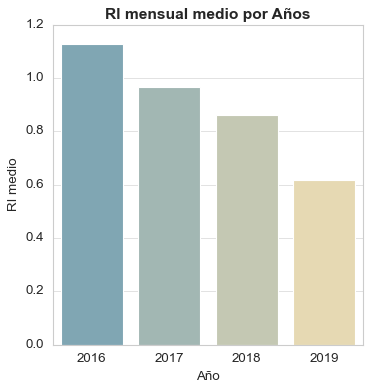

In [632]:
# Usamos los parámetros de Erika
# create the bar plot
plt.figure(figsize=(5,5))
sns.barplot(x='mov_year', y='RI', data= ri_por_year, palette=color)

# set the chart title and labels
plt.title('RI mensual medio por Años', fontweight='bold', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('RI medio', fontsize=12)

# save the plot as a PNG file
plt.savefig(f"images/{'RI mensual medio por Años'}.png", dpi=300, bbox_inches='tight')
    
plt.show()

Miramos la tendencia de RI por mes

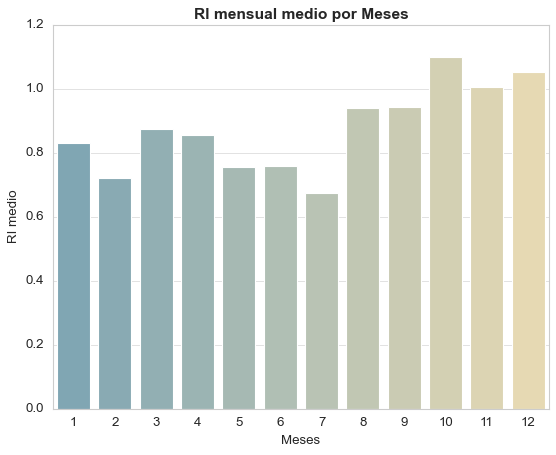

In [393]:
# agrupamos por mes
ri_por_month= df_final_filtered.groupby('mov_month')['RI'].mean().reset_index()
ri_por_month=pd.DataFrame(data= ri_por_month)

# creamos gráfico
plt.figure(figsize=(8,6))
sns.barplot(x='mov_month', y='RI', data=ri_por_month, palette=color)

plt.title('RI mensual medio por Meses', fontweight='bold', fontsize=14)
plt.xlabel('Meses', fontsize=12)
plt.ylabel('RI medio', fontsize=12)

# save the plot as a PNG file
plt.savefig(f"images/{'RI mensual medio por Meses'}.png", dpi=300, bbox_inches='tight')
    
plt.show()

La tendencia de rotación de stock es superior en los meses 8, 9, 10, 11 y 12.<br>
Analizamos la tendencia de RI mensual por meses y comparando por años

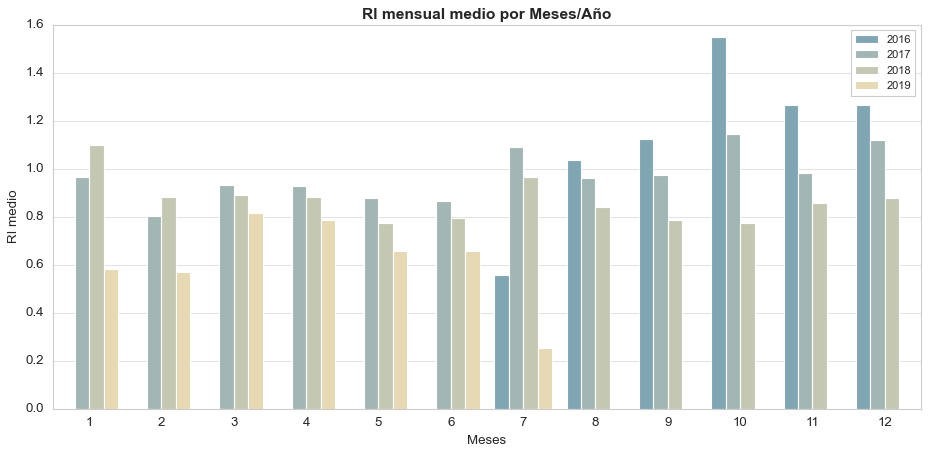

In [406]:
# agrupamos por mes/año
ri_por_month= df_final_filtered.groupby(['mov_year','mov_month'])['RI'].mean().reset_index()
ri_por_month=pd.DataFrame(data= ri_por_month)

# creamos gráfico
plt.figure(figsize=(14,6))
sns.barplot(x='mov_month', y='RI', data=ri_por_month,hue='mov_year',palette=color)

plt.title('RI mensual medio por Meses/Año', fontweight='bold', fontsize=14)
plt.xlabel('Meses', fontsize=12)
plt.ylabel('RI medio', fontsize=12)
plt.legend(fontsize=10)

# grabamos el gráfico en archivo PNG
plt.savefig(f"images/{'RI mensual medio por Meses_Año'}.png", dpi=300, bbox_inches='tight')
    
plt.show()

La tendencia de menor rotación a lo largo de los años se sigue observando, en cambio la tendencia de los meses de mayor rotación no se mantiene en el año 2018 y no se puede concluir para 2019, esto puede ser debido a mejoras de gestión de stock para productos de mayor rotación

A continuación filtramos los productos con mayor RI mensual para cada mes con el año y tienda asociada

In [577]:
df_RI_max_month= df_final_filtered.loc[df_final_filtered.groupby(['mov_month'])['RI'].nlargest(5).reset_index(0).index]
df_RI_max_month

,id_producto,idb,mov_year,mov_month,Ventas_mensuales,promos_mensuales,Inventario Inicial,Inventario Final,stock_medio,RI
218329,458394,9241,2017,1,56,0,0,3,1.5,37.333333
272042,484434,5211,2018,1,37,0,0,2,1.0,37.000000
78174,292949,9020,2018,1,51,0,1,2,1.5,34.000000
101386,342745,741,2017,1,34,0,0,2,1.0,34.000000
90091,342686,674,2017,1,33,0,0,2,1.0,33.000000
38512,242231,9706,2017,2,24,10,1,1,1.0,24.000000
42870,242232,9706,2017,2,22,10,1,1,1.0,22.000000
87646,342682,9050,2017,2,60,0,0,6,3.0,20.000000
93886,342686,9628,2017,2,30,0,3,0,1.5,20.000000
94497,342686,9706,2017,2,30,0,0,3,1.5,20.000000


In [635]:
# miramos si se repite algún producto
print('Tenemos', df_RI_max_month.id_producto.count(), 'registros', 'y se repiten', df_RI_max_month.id_producto.duplicated().sum())

Tenemos 60 registros y se repiten 32


In [636]:
# Vemos cuales son
duplicados = df_RI_max_month[df_RI_max_month.duplicated(subset=['id_producto'], keep=False)]['id_producto'].unique()
print('Los productos que aparecen más de una vez cuando buscamos los 5 productos con mayor RI mensual', 
      'para cada mes /año y tienda asociada son los siguientes:', duplicados)

Los productos que aparecen más de una vez cuando buscamos los 5 productos con mayor RI mensual para cada mes /año y tienda asociada son los siguientes: [292949 342686 242231 342682 240911 228217 249486 450083 429883 461280
 455722 342762 458392]


Analizamos el rendimiento de las diferentes tiendas

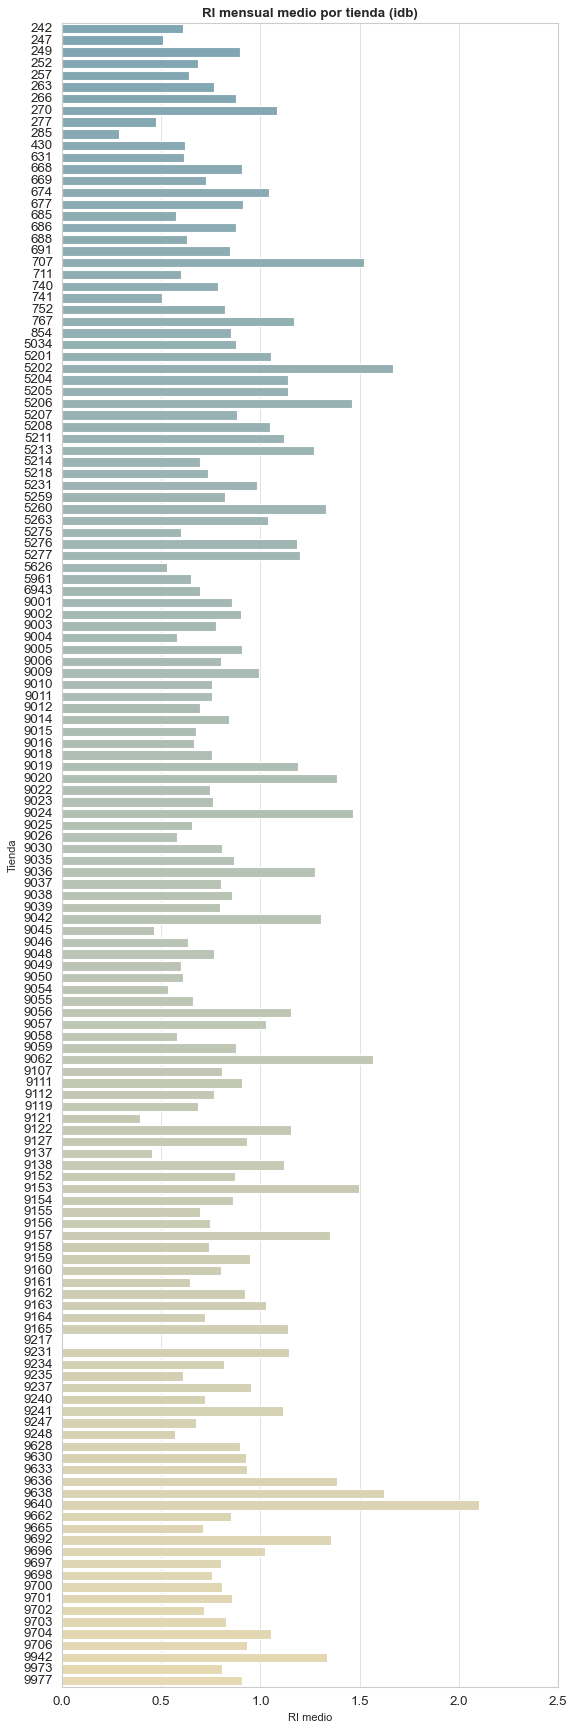

In [473]:
# agrupamos por tienda
ri_por_idb= df_final_filtered.groupby('idb')['RI'].mean().reset_index()
ri_por_idb=pd.DataFrame(data= ri_por_idb)

# creamos gráfico
plt.figure(figsize=(8,26))
sns.barplot(data=ri_por_idb,x="RI", y="idb", palette=color, orient='h')


plt.xlabel('RI medio', fontsize=10)
plt.ylabel('Tienda', fontsize=10)
#plt.tick_params(axis='x',top=True, labeltop=True, bottom=True, labelbottom=True)
plt.title('RI mensual medio por tienda (idb)', fontweight='bold', fontsize=12)


ax.tick_params(which='both', bottom=True, top=True, labelbottom=True, labeltop=True, rotation=90)
#ax.xaxis.set_label_position('top')
#ax.set_xlabel('RI', fontsize=10)

# grabamos el gráfico en archivo PNG
plt.savefig(f"images/{'RI mensual medio por tienda'}.png", dpi=300, bbox_inches='tight')
    
plt.show()

Se obserba como hay una tienda sin ninguna rotación tienda 9217 y debe estar cerrada.
A su vez se observa que hay tiendas más eficientes que otras, filtramos las que estan por encima del percentil 75%

In [638]:
ri_por_idb=ri_por_idb[ri_por_idb['RI']>1.1]
ri_por_idb

,idb,RI
20,707,1.521755
29,5202,1.670686
32,5206,1.461338
36,5213,1.271715
41,5260,1.331102
64,9020,1.388332
67,9024,1.466872
72,9036,1.275495
76,9042,1.308114
88,9062,1.569265


Si queremos ver el efecto de las promociones en los mismos, vamos a filtrar aquellos productos que en un año d

**PREGUNTA 2.**
*Cuantas promociones hay por mes, por tienda, promociones promedio*

In [680]:
df_promociones= df.groupby('mov_year')['tiene_promo'].mean().reset_index().rename(columns={'tiene_promo': 'promos_promedio'})

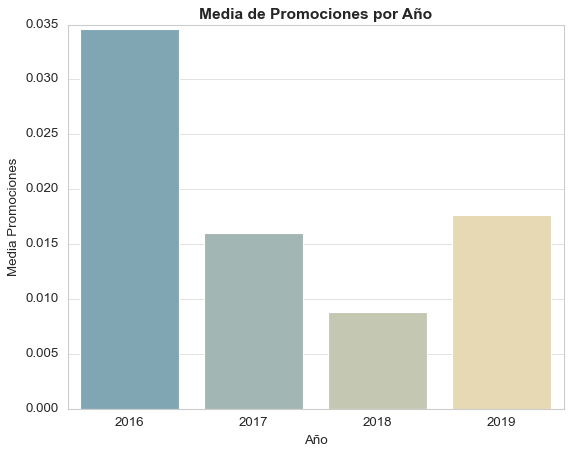

In [682]:
# creamos gráfico
plt.figure(figsize=(8,6))
sns.barplot(x='mov_year', y='promos_promedio', data=df_promociones, palette=color)

plt.title('Media de Promociones por Año', fontweight='bold', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Media Promociones', fontsize=12)

# save the plot as a PNG file
plt.savefig(f"images/{'Media Promociones por Año'}.png", dpi=300, bbox_inches='tight')
    
plt.show()

En el año 2016 hubieron muchas más promociones que los otros años, cabe destacar que los datos que se disponen del 2016 ni 2019 tampoco son todos los meses, así que si hay alguna influencia del mes vs las promociones estos valores podrían estar sesgados.
En el año 2018 casi no hubieron promociones

In [665]:
df_promociones= df.groupby('mov_month')['tiene_promo'].mean().reset_index().rename(columns={'tiene_promo': 'promos_promedio'})

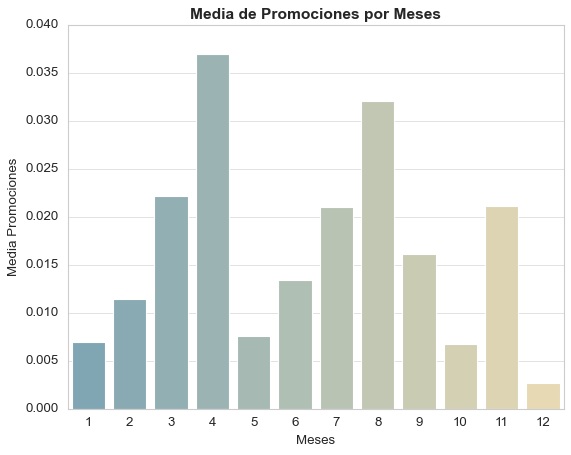

In [669]:
# creamos gráfico
plt.figure(figsize=(8,6))
sns.barplot(x='mov_month', y='promos_promedio', data=df_promociones, palette=color)

plt.title('Media de Promociones por Meses', fontweight='bold', fontsize=14)
plt.xlabel('Meses', fontsize=12)
plt.ylabel('Media Promociones', fontsize=12)

# save the plot as a PNG file
plt.savefig(f"images/{'Media Promociones por Meses'}.png", dpi=300, bbox_inches='tight')
    
plt.show()

La media de promociones es más alta durante los meses de abril, agosto y noviembre, pero los valores son muy bajos que quizás este análisis igual no dice mucho.
Miramos lo mismo con el total de promociones por mes y año a ver si vemos una relación

In [661]:
# agrupamos por mes y año, y calculamos el número de promociones
df_promociones= df.groupby(['mov_year', 'mov_month'])['tiene_promo'].sum().reset_index().rename(columns={'tiene_promo': 'promos_totales'})

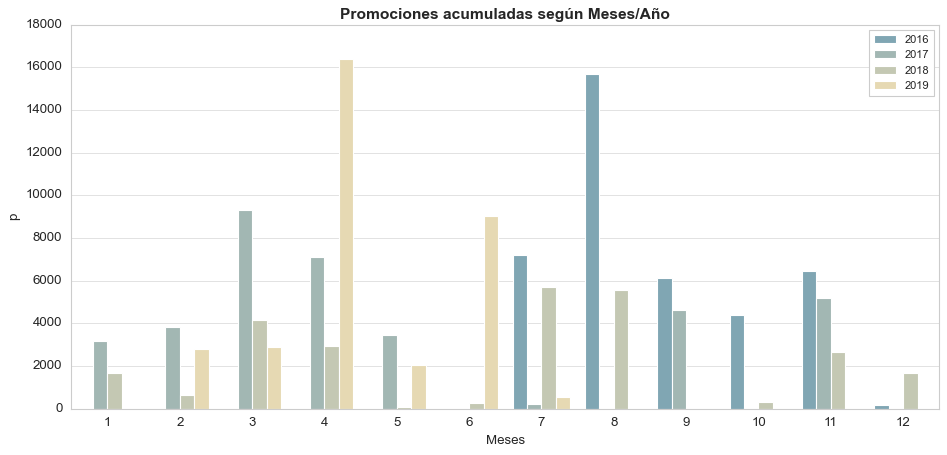

In [663]:
# creamos gráfico
plt.figure(figsize=(14,6))
sns.barplot(x='mov_month', y='promos_totales', data=df_promociones,hue='mov_year', palette=color)

plt.title('Promociones acumuladas según Meses/Año', fontweight='bold', fontsize=14)
plt.xlabel('Meses', fontsize=12)
plt.ylabel('p', fontsize=12)
plt.legend(fontsize=10)

# grabamos el gráfico en archivo PNG
plt.savefig(f"images/{'RI mensual medio por Meses_Año'}.png", dpi=300, bbox_inches='tight')
    
plt.show()

 No parece que haya una relación entre mes vs el número de promociones a lo largo de los años
 Analizamos por tienda

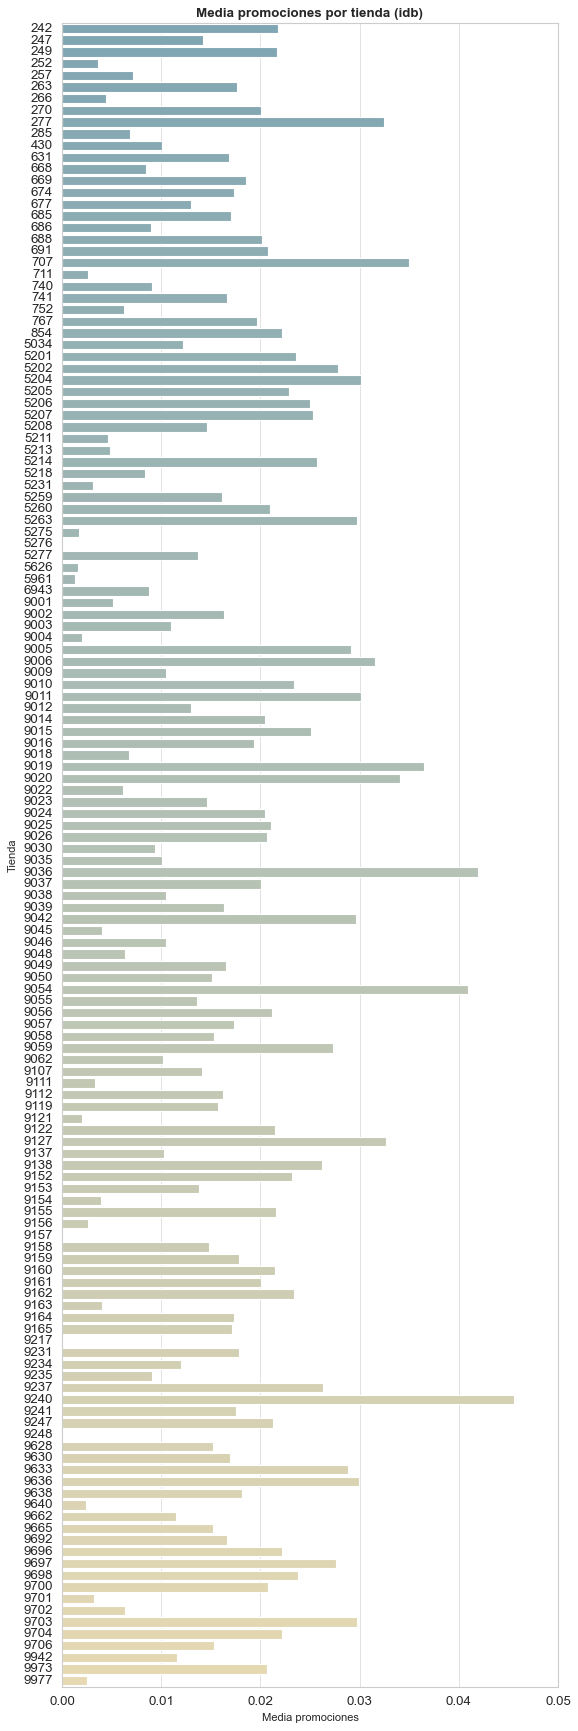

In [690]:
# agrupamos por tienda
promo_por_idb= df.groupby('idb')['tiene_promo'].mean().reset_index().rename(columns={'tiene_promo':'promos_media'})
promo_por_idb=pd.DataFrame(data= promo_por_idb)

# creamos gráfico
plt.figure(figsize=(8,26))
sns.barplot(data=promo_por_idb,x="promos_media", y="idb", palette=color, orient='h')


plt.xlabel('Media promociones', fontsize=10)
plt.ylabel('Tienda', fontsize=10)
plt.title('Media promociones por tienda (idb)', fontweight='bold', fontsize=12)


# grabamos el gráfico en archivo PNG
plt.savefig(f"images/{' Promociones Media por tienda'}.png", dpi=300, bbox_inches='tight')
    
plt.show()

Analizamos ver si hay alguna relación entre las promociones y la rotación de inventario por meses

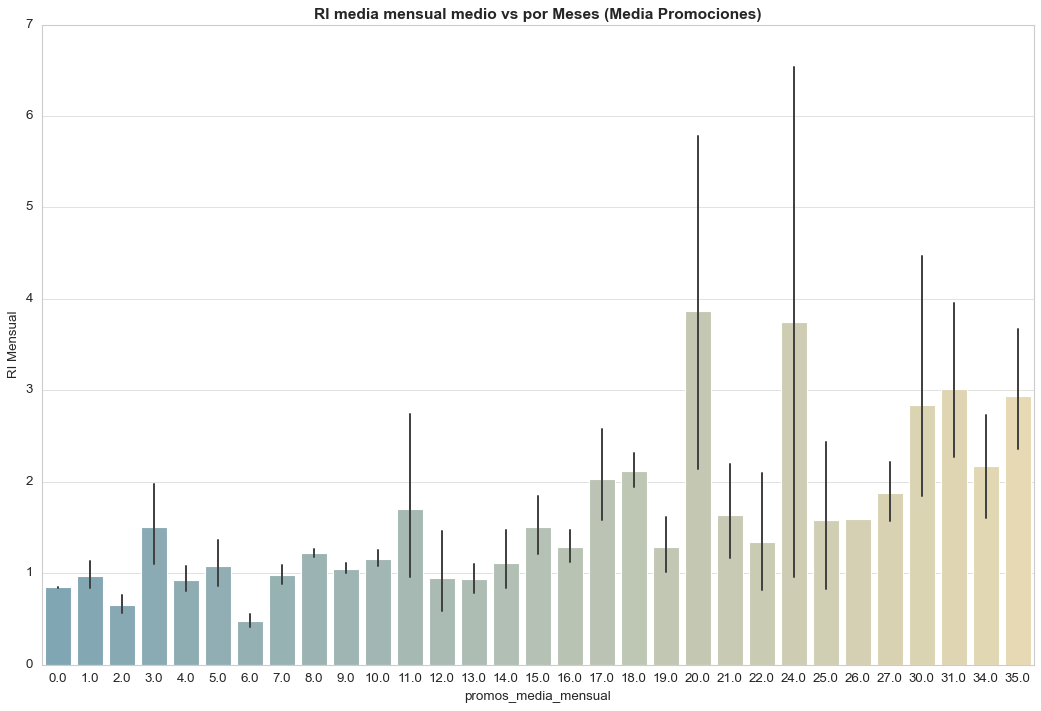

In [770]:
# agrupamos por mes y calculamos la media de promociones mensuales
promos_por_month= df_final_filtered.groupby(['mov_year','idb','id_producto','mov_month'])['promos_mensuales'].mean().reset_index().rename(columns={'promos_mensuales':'promos_media_mensual'})
promos_por_month=pd.DataFrame(data= promos_por_month)

# agrupamos por mes y calculamos la media de RI mensuales
ri_month=df_final_filtered.groupby(['mov_year','idb','id_producto','mov_month'])['RI'].mean().reset_index().rename(columns={'RI':'RI_media_mensual'})
ri_month=pd.DataFrame(data= ri_month)

df_ri_promo= promos_por_month.merge(ri_month, on=['mov_year','idb','id_producto','mov_month'])

# creamos gráfico
plt.figure(figsize=(16,10))
ax=sns.barplot(x='promos_media_mensual', y='RI_media_mensual', data=df_ri_promo, palette=color)

# Formatear etiquetas del eje X
etiquetas = ax.get_xticklabels()
nuevas_etiquetas = [f'{float(etiqueta.get_text()):.1f}' for etiqueta in etiquetas]
ax.set_xticklabels(nuevas_etiquetas)

plt.title('RI media mensual medio vs por Meses (Media Promociones)', fontweight='bold', fontsize=14)
plt.xlabel('promos_media_mensual', fontsize=12)
plt.ylabel('RI Mensual', fontsize=12)

# save the plot as a PNG file
#plt.savefig(f"images/{'RI Media mensual medio por Meses_MediaPromociones'}.png", dpi=300, bbox_inches='tight')
    
plt.show()

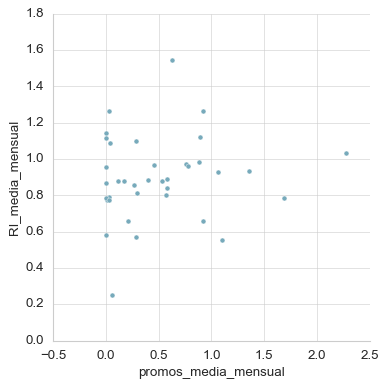

In [768]:
g = sns.relplot(data= df_ri_promo, x='promos_media_mensual', y='RI_media_mensual')